In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.765885, -47.871837)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("../data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] > 10) & (df_all_stations["Distancia"] < 50)] 

print(df_nearest_stations)

    REGI?O: UF:            ESTAC?O: CODIGO (WMO):     LATITUDE:    LONGITUDE:  \
2        CO  DF  PARANOA (COOPA-DF)          A047    -16.012222    -47.557417   
141      CO  DF          BRAZLANDIA          A042  -15.59972221   -48.1311111   
233      CO  DF     AGUAS EMENDADAS          A045    -15.596491    -47.625801   
239      CO  DF   GAMA (PONTE ALTA)          A046  -15.93527777  -48.13749999   

    ALTITUDE:                                            Arquivo  Distancia  
2      1043.0  INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2019...  43.322909  
141    1143.0  INMET_CO_DF_A042_BRAZLANDIA_01-01-2019_A_31-12...  33.325880  
233   1030.36  INMET_CO_DF_A045_AGUAS EMENDADAS_01-01-2019_A_...  32.357785  
239     990.0  INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2019_...  34.075013  


In [3]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,0.8,899.2,899.2,898.6,NaN,19.3,18.1,19.4,19.2,18.4,18.0,94.0,92.0,93.0,344.0,3.7,1.6,NaN
1,2019/01/01,0100 UTC,1.8,900.0,900.0,899.2,NaN,19.1,18.2,19.3,19.1,18.3,18.0,95.0,92.0,94.0,275.0,3.4,0.9,NaN
2,2019/01/01,0200 UTC,0.0,900.3,900.4,900.0,NaN,18.9,18.4,19.2,18.8,18.5,18.1,97.0,94.0,97.0,237.0,2.2,0.4,NaN
3,2019/01/01,0300 UTC,0.0,899.4,900.3,899.4,NaN,18.9,17.8,19.0,18.8,18.4,17.8,97.0,93.0,93.0,356.0,3.5,1.5,NaN
4,2019/01/01,0400 UTC,0.0,898.9,899.5,898.9,NaN,18.6,18.3,19.0,18.6,18.3,17.7,98.0,93.0,98.0,54.0,3.0,1.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2023/12/31,1900 UTC,0.0,901.5,902.6,901.5,NaN,28.2,16.6,28.8,27.7,18.7,16.3,55.0,49.0,49.0,303.0,6.0,3.3,2391.9
175292,2023/12/31,2000 UTC,0.0,901.2,901.6,901.2,NaN,27.5,17.6,28.5,27.1,18.1,16.5,56.0,49.0,55.0,302.0,5.9,3.5,1330.1
175293,2023/12/31,2100 UTC,0.0,901.1,901.2,900.8,NaN,25.9,18.3,27.7,25.7,18.3,17.0,63.0,53.0,63.0,301.0,6.4,2.8,631.6
175294,2023/12/31,2200 UTC,0.0,902.0,902.0,901.1,NaN,23.8,18.5,25.9,23.8,18.7,18.1,72.0,62.0,72.0,321.0,4.8,0.8,128.8


<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 0 to 175295
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Data                                                   175296 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       171378 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  171912 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        171858 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       171857 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                18599 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           171946 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   171444

/tmp/ipykernel_49467/3582512653.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


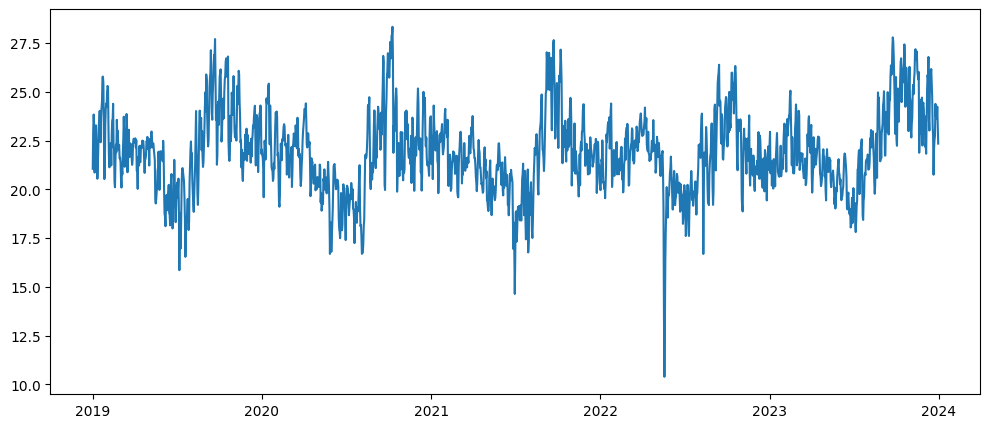

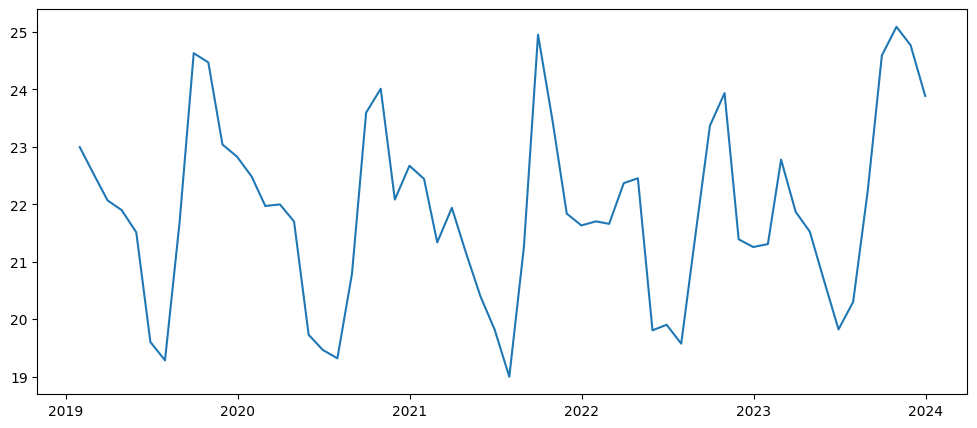

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (KJ/m²)                                  1461
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)                                  0
VENTO, V

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()

print(df_avarage_temperature_by_day)

#Teste
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_day[forecast_parameter], label='Previsão')
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_month[forecast_parameter], label='Previsão')
plt.show()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

MSE: 5.468639718487612
RMSE: 2.3385122874356705


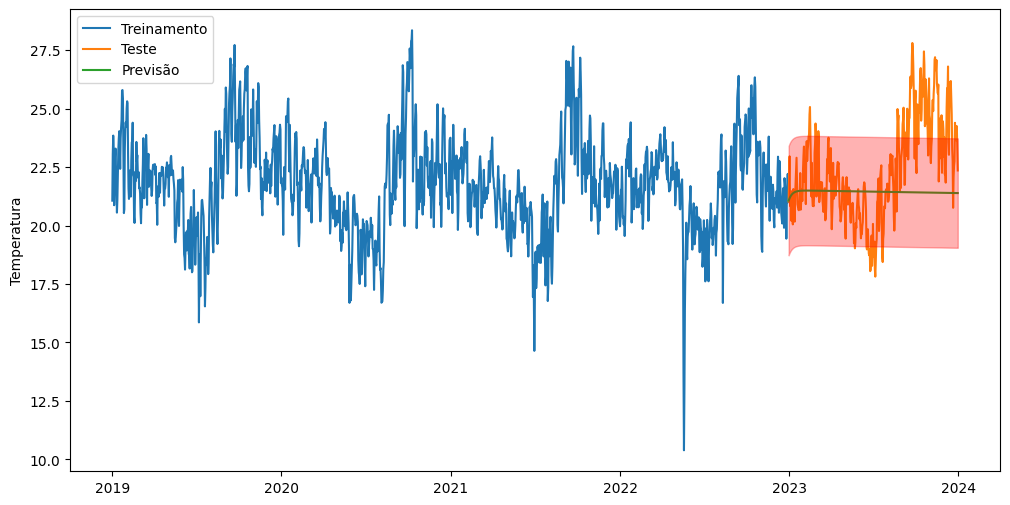

In [5]:
# Ajuste do modelo ARIMA
model = ARIMA(df_training[forecast_parameter], order=(1, 0, 0), trend='ct')
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test))

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Temperatura')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

# Salva o gráfico como arquivo de imagem
#plt.savefig('forecast.png')


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94553D-01    |proj g|=  2.46707D-01


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  7.02107D-01    |proj g|=  2.49966D-02

At iterate   10    f=  6.89291D-01    |proj g|=  1.86914D-03

At iterate   15    f=  6.89209D-01    |proj g|=  3.06618D-03

At iterate   20    f=  6.89156D-01    |proj g|=  6.37966D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   5.028D-05   6.892D-01
  F =  0.68915583185953488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


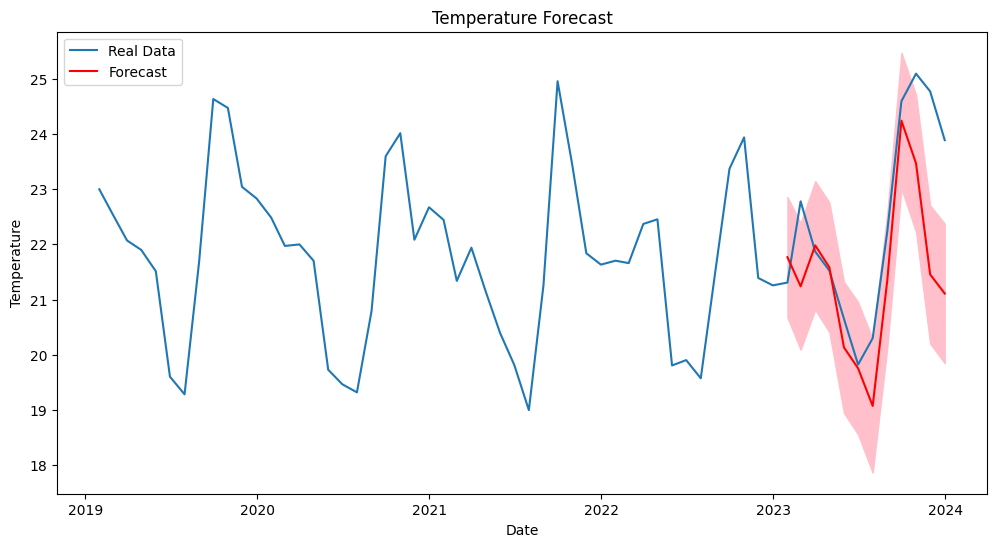

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(df_training_month[forecast_parameter], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast future values
forecast_periods =  int(len(df_test_month[forecast_parameter]))  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_not_null_values_month[forecast_parameter], label='Real Data')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


MSE: 3.639952536424312
RMSE: 1.9078659639566695


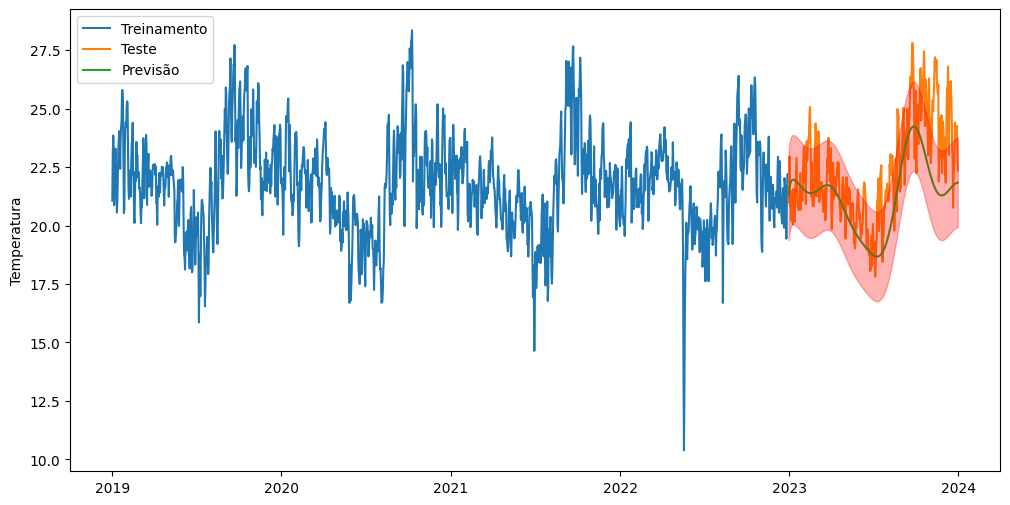

In [7]:
n = len(df_training[forecast_parameter])  # Number of data points
t = np.arange(n)
seasonality = 365  

# Create Fourier terms
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

num_fourier_terms = 4
fourier_terms = create_fourier_terms(t, seasonality, num_fourier_terms)

# Fit the ARIMA model using arima with Fourier terms as exogenous variables
model = ARIMA(df_training[forecast_parameter],exog=fourier_terms[:n], order=(1,0,0), trend='ct')
model_fit = model.fit()

# Forecast future values with the fitted model
forecast_exog = create_fourier_terms(np.arange(n, n + len(df_test)), seasonality, num_fourier_terms)

# Get the forecast for the future steps with exogenous variables
forecast_df = pd.DataFrame(forecast_exog, columns=[f'Fourier_{i+1}' for i in range(num_fourier_terms * 2)])

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test), exog=forecast_df)

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Temperatura')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/

RMSE rolling 1 dia: 0.947


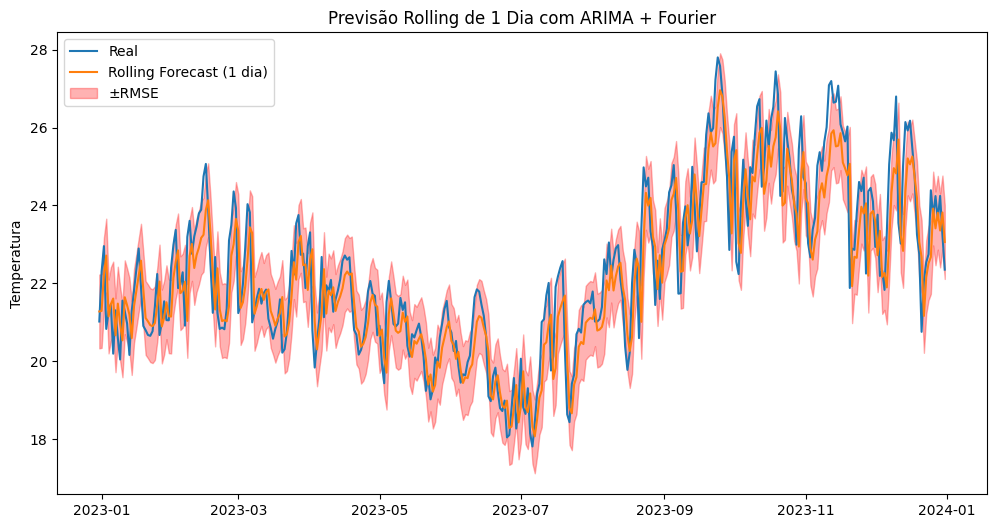

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parâmetros do modelo
seasonality = 365
num_fourier_terms = 4

# Função para criar os termos de Fourier
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

# Série completa: usar treino + teste para poder criar os índices de tempo
full_series = pd.concat([df_training, df_test])
full_index = full_series.index
full_values = full_series[forecast_parameter].values
n_train = len(df_training)
n_test = len(df_test)

# Inicializar listas de previsões e valores reais
forecast_rolling = []
actuals = []

# Rolling: prever 1 ponto por vez ao longo do período de teste
for i in range(n_test):
    # Janela de treino vai até o ponto atual
    end_idx = n_train + i
    train_series = full_values[:end_idx]
    t_train = np.arange(end_idx)
    t_forecast = np.array([end_idx])  # ponto seguinte
    
    # Fourier para treino e previsão
    fourier_train = create_fourier_terms(t_train, seasonality, num_fourier_terms)
    fourier_forecast = create_fourier_terms(t_forecast, seasonality, num_fourier_terms)
    
    try:
        model = ARIMA(train_series, exog=fourier_train, order=(1, 0, 0), trend='ct')
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1, exog=fourier_forecast)
        
        forecast_rolling.append(forecast[0])
        actuals.append(full_values[end_idx])
    except Exception as e:
        print(f"Erro na iteração {i}: {e}")
        forecast_rolling.append(np.nan)
        actuals.append(full_values[end_idx])

# Calcular RMSE
rmse = mean_squared_error(actuals, forecast_rolling, squared=False)
print(f"RMSE rolling 1 dia: {rmse:.3f}")

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, actuals, label='Real')
plt.plot(df_test.index, forecast_rolling, label='Rolling Forecast (1 dia)')
plt.fill_between(df_test.index,
                 np.array(forecast_rolling) - rmse,
                 np.array(forecast_rolling) + rmse,
                 alpha=0.3, color='red', label='±RMSE')
plt.legend()
plt.ylabel('Temperatura')
plt.title('Previsão Rolling de 1 Dia com ARIMA + Fourier')
plt.show()
